In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn import ensemble
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes

#from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import string
from textblob import TextBlob,Word
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import words,wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
%matplotlib inline

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/covid_vaccine.csv')
df.head()

,user_name,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,MyNewsNE,Australia to Manufacture Covid-19 Vaccine and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shubham Gupta,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Journal of Infectiology,Deaths due to COVID-19 in Affected Countries\n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Zane,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ann-Maree O’Connor,@michellegrattan @ConversationEDU This is what...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(161251, 9)

In [5]:
df.isnull().sum()

user_name          4
text               5
Unnamed: 2    161251
Unnamed: 3    161251
Unnamed: 4    161251
Unnamed: 5    161251
Unnamed: 6    161251
Unnamed: 7    161251
Unnamed: 8    161251
dtype: int64

In [6]:
df.dropna(inplace=False)
df.shape

(161251, 9)

In [7]:
df.head()

,user_name,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,MyNewsNE,Australia to Manufacture Covid-19 Vaccine and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shubham Gupta,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Journal of Infectiology,Deaths due to COVID-19 in Affected Countries\n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Zane,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ann-Maree O’Connor,@michellegrattan @ConversationEDU This is what...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.pop("Unnamed: 2")

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
161246   NaN
161247   NaN
161248   NaN
161249   NaN
161250   NaN
Name: Unnamed: 2, Length: 161251, dtype: float64

In [9]:
df.head()

,user_name,text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,MyNewsNE,Australia to Manufacture Covid-19 Vaccine and ...,NaN,NaN,NaN,NaN,NaN,NaN
1,Shubham Gupta,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,NaN,NaN,NaN,NaN,NaN,NaN
2,Journal of Infectiology,Deaths due to COVID-19 in Affected Countries\n...,NaN,NaN,NaN,NaN,NaN,NaN
3,Zane,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,NaN,NaN,NaN,NaN,NaN
4,Ann-Maree O’Connor,@michellegrattan @ConversationEDU This is what...,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2= df.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1)

In [11]:
df2

,user_name,text
0,MyNewsNE,Australia to Manufacture Covid-19 Vaccine and ...
1,Shubham Gupta,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Journal of Infectiology,Deaths due to COVID-19 in Affected Countries\n...
3,Zane,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,Ann-Maree O’Connor,@michellegrattan @ConversationEDU This is what...
...,...,...
161246,Multivalent Dirk Haussecker,$ABUS totally missing in action. Nothing on mR...
161247,Craig Brown 🏳️‍🌈,"“It’s not a race,” says man already vaccinated..."
161248,Faith in New York,⚠️PSA FOR COVID-19 VACCINE⚠️\n\nIf you live in...
161249,Openly Black & Queer & Adrian 🎵🎬⚖️,My doctor: Like to schedule your #CovidVaccine...


In [12]:
df2.isnull().sum()

user_name    4
text         5
dtype: int64

In [13]:
df2.dropna(inplace=True)
df2.shape

(161242, 2)

In [14]:
df2.head()

,user_name,text
0,MyNewsNE,Australia to Manufacture Covid-19 Vaccine and ...
1,Shubham Gupta,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Journal of Infectiology,Deaths due to COVID-19 in Affected Countries\n...
3,Zane,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,Ann-Maree O’Connor,@michellegrattan @ConversationEDU This is what...


In [15]:
df2.isnull().sum()

user_name    0
text         0
dtype: int64

In [16]:
data = df2.drop(['user_name'], axis=1)

In [17]:
data.shape


(161242, 1)

In [18]:
data.head()

,text
0,Australia to Manufacture Covid-19 Vaccine and ...
1,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Deaths due to COVID-19 in Affected Countries\n...
3,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,@michellegrattan @ConversationEDU This is what...


In [19]:
#Test TextBlob
blob1= TextBlob("I hate monday")

In [20]:
blob1.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

# Data Preprocessing

In [21]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

emoticons = emoticons_happy.union(emoticons_sad)

special_char=re.compile(r'[-%<>.?!,;#$:/\\()^~`$₹+\'*&_{}=|0-9]')  # All special characters

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\u200b"
        "\n"
        "❌▶◾✔️➕➖•❤️⚠️❤•●⭐🤝✌🤟🤩🤪🤣🤗"         "]+", flags=re.UNICODE)

corp = words.words()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def cleanTxt(text):
  text = text.lower()
  global emoticons
  global special_char
  global emoji_pattern
  global corp
  lemmatizer = WordNetLemmatizer()
  text = re.sub('@.*? |#.*? |@.*?: |#.*?: |@.*?:|#.*?:', '', text)
  text = re.sub('@.*? |@.*?:', '', text)
  text = re.sub(r'[^\x00-\x7F]+',' ', text)
  text = re.sub(r'https?:\/\/.*|http?:\/\/.*',"",text)
  text =re.sub("b\"RT|b\'|b\"|b\'RT|b\'rt|b\"rt|\\n|\\\\n|RT", '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'‚Ä¶', '', text)
  text = emoji_pattern.sub(r'', text)
  text = special_char.sub(r" ",text)

  word_tokens = word_tokenize(text)

  filtered_tweet = []
  for w in word_tokens:
      if ((w in corp)  and (w not in emoticons) and (w not in string.punctuation)  and (len(w)>1)):
          filtered_tweet.append(w)
            
    
  filtered_tweets=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in filtered_tweet]        
  filtered_sentence = ' '.join(filtered_tweets)
  return filtered_sentence



 

# Cleaning the text 
data['text'] = data['text'].apply(cleanTxt)

# Show the cleaned text
data

,text
0,to manufacture covid vaccine and give it to th...
1,be do very good
2,due to covid in affected more
3,stay safe di da
4,this be what for leadership in our country vou...
...,...
161246,totally miss in action nothing on nothing on s...
161247,it not race man already
161248,for covid vaccine if you live in the or area a...
161249,my doctor like to schedule your me


In [22]:
data.to_csv(r'/content/drive/MyDrive/datasets\covid_vaccine_clean.csv', index = False)

# Determine sentiment polarity using TextBlob

In [23]:
# Create a function to get the Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new col umns
data['Subjectivity'] = data['text'].apply(getSubjectivity)
data['Polarity'] = data['text'].apply(getPolarity)

#Show the new dataframe with the new columns
data

,text,Subjectivity,Polarity
0,to manufacture covid vaccine and give it to th...,0.800000,0.400000
1,be do very good,0.780000,0.910000
2,due to covid in affected more,0.437500,0.187500
3,stay safe di da,0.500000,0.500000
4,this be what for leadership in our country vou...,0.000000,0.000000
...,...,...,...
161246,totally miss in action nothing on nothing on s...,0.416667,-0.050000
161247,it not race man already,0.000000,0.000000
161248,for covid vaccine if you live in the or area a...,0.500000,0.136364
161249,my doctor like to schedule your me,0.000000,0.000000


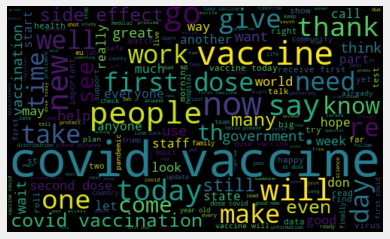

In [24]:
#WordCloud Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

allWords = ' '.join( [str(twts) for twts in data['text']] )

# values = ','.join([str(i) for i in value_list])

wordCloud = WordCloud(width=500, height=300, random_state= 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Sentiment'] = data['Polarity'].apply(getAnalysis)

# Show the dataframe
data

,text,Subjectivity,Polarity,Sentiment
0,to manufacture covid vaccine and give it to th...,0.800000,0.400000,Positive
1,be do very good,0.780000,0.910000,Positive
2,due to covid in affected more,0.437500,0.187500,Positive
3,stay safe di da,0.500000,0.500000,Positive
4,this be what for leadership in our country vou...,0.000000,0.000000,Neutral
...,...,...,...,...
161246,totally miss in action nothing on nothing on s...,0.416667,-0.050000,Negative
161247,it not race man already,0.000000,0.000000,Neutral
161248,for covid vaccine if you live in the or area a...,0.500000,0.136364,Positive
161249,my doctor like to schedule your me,0.000000,0.000000,Neutral


In [26]:
#Save labeled dataset
data.to_csv(r'/content/drive/MyDrive/datasets\labeled_covid_vaccine.csv', index = False)

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]): # di setiap baris data
  plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color='red') # X, Y, COLOR

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

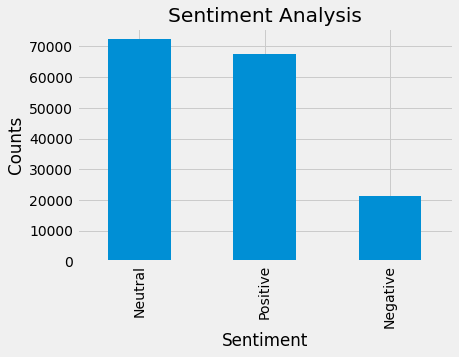

In [28]:
# Show the values counts

data['Sentiment'].value_counts()

# Plot and visualize the counts
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [29]:
data['Sentiment'].value_counts()

Neutral     72396
Positive    67519
Negative    21327
Name: Sentiment, dtype: int64

# Build Machine Learning Supervised model

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Vectorize the tweets**
Create a TfidfVectorizer and use it to vectorize the tweets. Use max_features to take a selection of terms (1000)

In [31]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(data.text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,about,above,absolutely,access,accord,across,act,action,actually,add,address,administer,administration,adult,adverse,advice,after,afternoon,again,against,age,ago,agree,ahead,air,al,alert,all,allow,almost,along,already,also,always,amaze,among,an,analysis,and,...,whole,why,wi,wife,will,willing,win,wish,with,within,without,woman,won,wonder,wonderful,word,work,worker,world,worried,worry,worth,would,wow,write,wrong,yeah,year,yes,yesterday,yet,yo,york,you,young,your,yours,yourself,yr,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = words_df
y = data.Sentiment

X.shape

(161242, 1000)

In [33]:
y.shape

(161242,)

In [34]:
y.head()

0    Positive
1    Positive
2    Positive
3    Positive
4     Neutral
Name: Sentiment, dtype: object

**The algorithms:**

Linear Regression

Logistic Regression

Random Forest Classifier

Linear SVM

Multinomial NB 

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

**Training**

In [36]:
%%time
# Create and train a logistic regression
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

CPU times: user 35min, sys: 1min 44s, total: 36min 44s
Wall time: 18min 46s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
%%time
# Create and train a random forest classifier
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X, y)

CPU times: user 4min 11s, sys: 655 ms, total: 4min 11s
Wall time: 4min 10s


In [38]:
%%time
# Create and train a linear support vector classifier (LinearSVC)
svc = LinearSVC()
svc.fit(X, y)

CPU times: user 3.5 s, sys: 10.9 ms, total: 3.51 s
Wall time: 3.49 s


In [39]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(X, y)

CPU times: user 1.68 s, sys: 50.1 ms, total: 1.73 s
Wall time: 1.28 s


In [40]:
#train test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [41]:
%%time

print("Training logistic regression")
logreg.fit(X_train, y_train)

print("Training random forest")
forest.fit(X_train, y_train)

print("Training SVC")
svc.fit(X_train, y_train)

print("Training Naive Bayes")
bayes.fit(X_train, y_train)

Training logistic regression
Training random forest
Training SVC
Training Naive Bayes
CPU times: user 27min 44s, sys: 1min 13s, total: 28min 58s
Wall time: 16min 15s


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
y_true = y_test
y_true

49709      Neutral
47639      Neutral
34420     Positive
25152     Positive
88293      Neutral
            ...   
75732     Negative
110101     Neutral
152617     Neutral
43660     Positive
40376     Positive
Name: Sentiment, Length: 40311, dtype: object

**Logistic Regression**

In [44]:
y_pred = logreg.predict(X_test)
y_pred

array(['Neutral', 'Neutral', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [45]:
matrix = confusion_matrix(y_true, y_pred)

In [46]:
label_names = pd.Series(['negative', 'neutral', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted neutral,Predicted positive
Is negative,3488,1146,686
Is neutral,61,17805,102
Is positive,359,1279,15385


In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9098757163057231

**SVM**

In [48]:
y_true = y_test
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'neutral', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)



,Predicted negative,Predicted neutral,Predicted positive
Is negative,3475,1145,700
Is neutral,62,17804,102
Is positive,336,1283,15404


In [49]:
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9099997519287539

**Random Forest** 

In [65]:
y_true = y_test
y_pred = forest.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'neutral', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted neutral,Predicted positive
Is negative,3393,1085,842
Is neutral,21,17795,152
Is positive,334,1224,15465


In [66]:
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9092555381905684

**Naive Bayes**

In [63]:
y_true = y_test
y_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['negative', 'neutral', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

,Predicted negative,Predicted neutral,Predicted positive
Is negative,1680,1264,2376
Is neutral,15,17177,776
Is positive,117,1296,15610


In [64]:
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.8550271638014437

# Prediction Test

In [ ]:
# Prediction
# Create some test data

pd.set_option("display.max_colwidth", 200)

datatest = pd.DataFrame({'content': [
    "I love the covid",
    "covid vaccine is bad",
    "I'm not sure the effectiveness of covid vaccine"
]})
datatest

In [51]:
print(vectorizer.get_feature_names())

['able', 'about', 'above', 'absolutely', 'access', 'accord', 'across', 'act', 'action', 'actually', 'add', 'address', 'administer', 'administration', 'adult', 'adverse', 'advice', 'after', 'afternoon', 'again', 'against', 'age', 'ago', 'agree', 'ahead', 'air', 'al', 'alert', 'all', 'allow', 'almost', 'along', 'already', 'also', 'always', 'amaze', 'among', 'an', 'analysis', 'and', 'announce', 'announcement', 'another', 'answer', 'anti', 'any', 'anyone', 'anything', 'apparently', 'apply', 'appointment', 'approach', 'approval', 'approve', 'ar', 'area', 'arm', 'around', 'arrive', 'article', 'ask', 'at', 'attention', 'availability', 'available', 'average', 'avoid', 'aware', 'away', 'awesome', 'back', 'bad', 'bank', 'base', 'batch', 'be', 'because', 'become', 'becomes', 'before', 'begin', 'behind', 'believe', 'below', 'best', 'between', 'beyond', 'big', 'bill', 'billion', 'birthday', 'bit', 'black', 'blame', 'bless', 'block', 'blood', 'board', 'body', 'book', 'both', 'brazil', 'break', 'bril

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
datatest_vectors = vectorizer.transform(datatest.content)
datatest_words_df = pd.DataFrame(datatest_vectors.toarray(), columns=vectorizer.get_feature_names())
datatest_words_df

In [ ]:
prediction = logreg.predict(datatest_words_df)
prediction

In [61]:
def pred_text(text):
    global logreg
    text = vectorizer.transform(text)
    text = clean_text(text)
    # txt = text.tolist(), columns=vectorizer.get_feature_names()
    i=txt.lower()
    mat=[i.count(j) for j in txt]
    lgr_pred=logreg.predict([mat])

    return lgr_pred

In [ ]:
pred = pred_text(['i hope one day this pandemic situation will be over'])
pred